In [1]:
from Bio import SearchIO
import pandas as pd
import glob
import os

In [2]:
df = pd.DataFrame(columns=['full_bitscore', 'domain_bitscore'])
hmmfile = 'ko_hmms/ectoine/GCF_000006175.1/K00003'

In [3]:
def retrieve_max_hmm_scores(hmmfile):
    with open(hmmfile, 'r') as handle:
        max_hit = 0
        max_dom = 0
        for record in SearchIO.parse(handle, 'hmmer3-tab'):
            for hit in (record.hits):
                if hit.bitscore> max_hit:
                    max_hit = hit.bitscore 
            for dom in (record.hsps):
                if dom.bitscore > max_dom:
                    max_dom = dom.bitscore
    return(max_hit, max_dom)

In [28]:
df = pd.DataFrame(columns=['full_bitscore', 'domain_bitscore'])
for hmmfile in glob.glob('ko_hmms/glycerol/GCF_000006175.1/K*'):
    index_name = os.path.basename(hmmfile)
    full_bitscore, domain_bitscore = retrieve_max_hmm_scores(hmmfile)
    df.loc[index_name] = (full_bitscore, domain_bitscore)

In [33]:
for file in glob.glob('ko_tables/glycerol/*csv'):
    df=pd.read_csv(file, sep='\t', index_col=0)

In [6]:
kofamlist = pd.read_csv('/vortexfs1/home/halexander/kofamscan/db/ko_list', sep='\t', index_col=0)

In [12]:
KO_index = pd.read_csv(glob.glob('ko_tables/glycerol/*csv')[0], sep='\t', index_col=0).index

In [22]:
KO_index=['K19634', 'K06122', 'K14452']

In [23]:
kofamlist.loc[KO_index]

,threshold,score_type,profile_type,F-measure,nseq,nseq_used,alen,mlen,eff_nseq,re/pos,definition
knum,,,,,,,,,,,
K19634,-,-,-,-,2,1,309,309,0.38,0.585,D-galacturonate reductase [EC:1.1.1.365]
K06122,234.67,full,all,0.936508,60,32,153,141,0.76,0.590,glycerol dehydratase small subunit [EC:4.2.1.30]
K14452,569.67,domain,all,0.538924,170,165,1284,506,2.53,0.590,gastric triacylglycerol lipase [EC:3.1.1.3]


In [24]:
ko_subset = kofamlist.loc[KO_index]


In [38]:
out_df = pd.DataFrame(columns=KO_index)

for csv_file in glob.glob(os.path.join('ko_tables/glycerol/GCF*csv')):
    df = pd.read_csv(csv_file, sep='\t', index_col=0)
    for k in KO_index:
        column = None
        if kofamlist.loc[k, 'score_type']=='full':
            column = 'full_bitscore'
            ref_val = float(kofamlist.loc[k,'threshold'])
        elif kofamlist.loc[k, 'score_type']=='domain':
            column = 'domain_bitscore'
            ref_val = float(kofamlist.loc[k,'threshold'])
        else:
            column = 'full_bitscore'
            ref_val = 100
        if df.loc[k,column] > ref_val:
            out_df.loc[csv_file, k]=1
        else:
            out_df.loc[csv_file,k]=0

<AxesSubplot:ylabel='Frequency'>

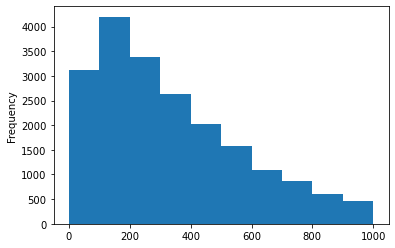

In [57]:
pd.to_numeric(kofamlist.threshold[kofamlist.threshold.sort_values()!='-']).plot(kind='hist', range=[0,1000])

In [26]:
kofamlist.loc[k,'threshold']

'-'

In [35]:
KO_index

Index(['K00836', 'K06718', 'K06720', 'K15785', 'K00928', 'K10674', 'K15783',
       'K15784', 'K00003', 'K00133'],
      dtype='object')

In [17]:
out_df

,K00836,K06718,K06720,K15785,K00928,K10674,K15783,K15784,K00003,K00133
name,0,0,0,0,0,0,0,0,0,1


In [38]:
pd.read_csv('ko_tables/ectoine_bact.csv')

,Unnamed: 0,K00003,K15783,K00928,K06718,K06720,K00836,K15785,K15784,K10674,K00133
0,kofamscan/ko_tables/ectoine/GCF_000210915.2.csv,0,0,1,0,0,0,0,0,0,1
1,kofamscan/ko_tables/ectoine/GCF_000590925.1.csv,1,1,1,0,0,0,1,0,0,1
2,kofamscan/ko_tables/ectoine/GCF_001044335.1.csv,1,0,1,1,1,1,0,0,0,1
3,kofamscan/ko_tables/ectoine/GCF_000015645.1.csv,1,0,1,0,0,0,0,0,0,1
4,kofamscan/ko_tables/ectoine/GCF_000485905.1.csv,1,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
892,kofamscan/ko_tables/ectoine/GCF_000010405.1.csv,1,0,1,0,0,0,0,0,0,1
893,kofamscan/ko_tables/ectoine/GCF_000178875.2.csv,0,0,1,0,0,0,0,0,0,1
894,kofamscan/ko_tables/ectoine/GCF_002983865.1.csv,1,1,1,0,1,0,0,1,0,1
895,kofamscan/ko_tables/ectoine/GCF_000439495.1.csv,0,0,1,0,0,0,0,0,0,1


In [21]:
kofamlist[kofamlist.score_type=='-']

,threshold,score_type,profile_type,F-measure,nseq,nseq_used,alen,mlen,eff_nseq,re/pos,definition
knum,,,,,,,,,,,
K00093,-,-,-,-,2,2,382,382,0.41,0.590,methanol dehydrogenase [EC:1.1.1.244]
K00095,-,-,-,-,2,2,365,365,0.41,0.590,mannitol dehydrogenase [EC:1.1.1.255]
K00307,-,-,-,-,3,2,545,538,0.43,0.589,reticuline oxidase [EC:1.21.3.3]
K00492,-,-,-,-,1,1,396,396,0.39,0.593,"1,3,7-trimethyluric acid 5-monooxygenase [EC:1..."
K01143,-,-,-,-,2,1,226,226,0.37,0.590,exodeoxyribonuclease (lambda-induced) [EC:3.1....
...,...,...,...,...,...,...,...,...,...,...,...
K24305,-,-,-,-,3,2,350,349,0.46,0.594,"UDP-2-acetamido-4-(D-alanylamino)-2,4,6-trideo..."
K24307,-,-,-,-,3,2,234,234,0.51,0.593,5-N-acetyl-7-N-(D-alanyl)-legionaminic acid cy...
K24312,-,-,-,-,5,2,320,320,0.39,0.587,UDP-4-keto-D-FucNAc 4-reductase
